# Import library and dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

import lime
import lime.lime_tabular

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

from imblearn.under_sampling import RandomUnderSampler
#smote - Tạo thêm dữ liệu để cân bằng 

# Yêu cầu : Dự đoán khả năng thu hồi nợ của khách hàng (Fully Paid/ Charged off) dựa vào các đặc trưng trong dataset

# I. Dataset Discovery

In [4]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\credit_train.csv')

In [5]:
df[df['Current Loan Amount'] > 80000000]['Loan Status'].unique()

array(['Fully Paid'], dtype=object)

In [6]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


### Một vài nhận xét về dataset
- Có giá trị na trong dataset
- Không có giá trị âm trong dataset

# II. Data understanding & Data preparation

## 2.1. Deal with na values

In [9]:
#First, we neet to delete few columns that do not make sense in the analysis
df.drop(columns = ['Loan ID', 'Customer ID'], inplace = True)

In [10]:
#Calculate the na total and na percent
def _na():
    na_total = df.isna().sum()
    na_percent = (100*na_total/ df.shape[0]).round(3)
    na_table = pd.concat([na_total, na_percent], axis = 1)
    na_table.columns = ['total', 'percent']
    na_table = na_table[na_table['total'] != 0].sort_values('percent', ascending = False)
    return na_table
_na()

,total,percent
Months since last delinquent,53655,53.381
Credit Score,19668,19.567
Annual Income,19668,19.567
Years in current job,4736,4.712
Bankruptcies,718,0.714
Tax Liens,524,0.521
Maximum Open Credit,516,0.513
Current Credit Balance,514,0.511
Number of Credit Problems,514,0.511
Number of Open Accounts,514,0.511


In [11]:
#month since last delinquent : Số tháng kể từ lần chậm trả gần nhất
#Na của cột này > 50 % nên ta sẽ loại bỏ nó 
df.drop(columns = 'Months since last delinquent', inplace = True)

In [12]:
#Let check the na of the columns has na < 1
df[df['Term'].isna()]
#The na from 100000 to 100513, seem like this is na totally. So we can remove it all
df.drop(index = range(100000, 100514), inplace = True)

In [13]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222
Bankruptcies,204,0.204
Tax Liens,10,0.010
Maximum Open Credit,2,0.002


In [14]:
#The na remaining which is below 1%. Let see what is this
df['Tax Liens'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [15]:
df['Maximum Open Credit'].unique()

array([ 416746.,  850784.,  750090., ..., 1287792., 2299198.,  892606.])

In [16]:
#Let see what Bankuptcies has
df['Bankruptcies'].unique()
#Seem like it's continuous feature

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

In [17]:
#Tax Lien and Maximum open credit, bankruptcies is continuous feature, but it have very small percent, so we can change it to mode
Tax_Max_na = ['Maximum Open Credit', 'Tax Liens', 'Bankruptcies']
for i in Tax_Max_na:
    mode_val = df[i].mode().iloc[0]
    df[i].fillna(mode_val, inplace = True)

In [18]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222


<Axes: xlabel='Years in current job', ylabel='Count'>

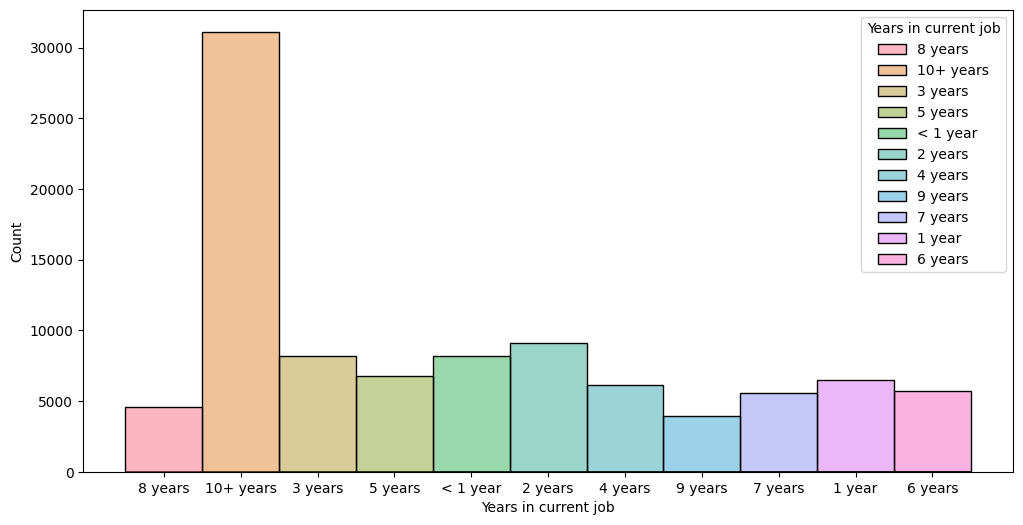

In [19]:
#Let check the years in current job
plt.figure(figsize = (12,6))
sns.histplot(df, x = 'Years in current job', hue = 'Years in current job')


In [20]:
#Seem like 10+ years has the largest number, we can fill na with this value
df['Years in current job'].fillna('10+ years', inplace = True)

In [21]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154


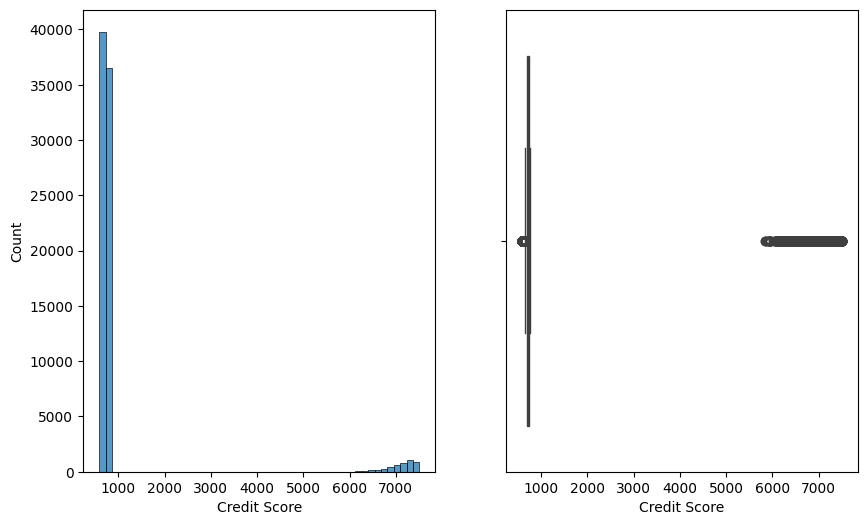

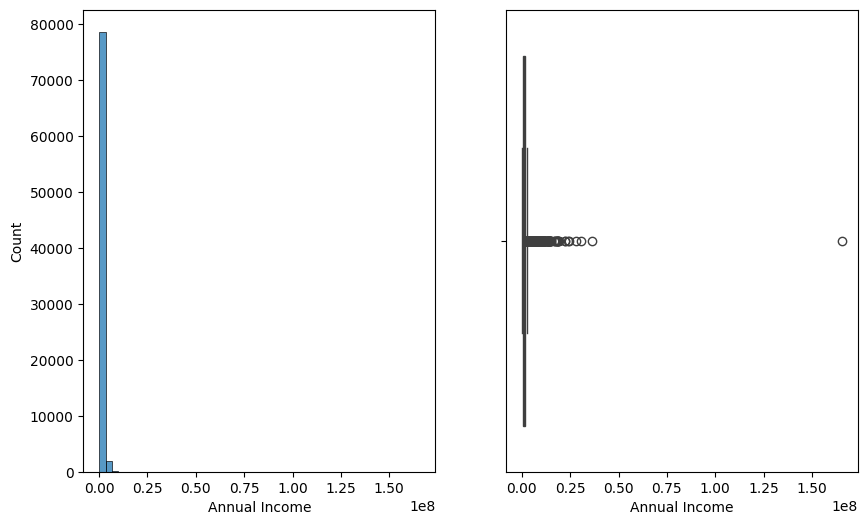

In [22]:
#Let's check the remaining columns
my_l = ['Credit Score', 'Annual Income']
for j, i in enumerate(my_l):
    fig, ax = plt.subplots(1,2,figsize = (10,6))
    sns.histplot(df, x = i, bins = 50, ax = ax[0])
    sns.boxplot(df, x = i, ax = ax[1])
    plt.show()


In [23]:
#Credit score và annual có lượng ngoại lai khá lớn và có giá trị ngoại lai lớn
#Nên chúng ta sẽ để những giá trị na là Median
for i in my_l: 
    df[i].fillna(df[i].median(), inplace = True)


## 2.2. Deal with duplicate values

In [24]:
df.duplicated().sum()
#We have 10215 duplicate values

10215

In [25]:
#Drop dulicate values
df.drop_duplicates(inplace = True)

In [26]:
df.duplicated().sum()

0

## 2.3. Change data type 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89785 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89785 non-null  object 
 1   Current Loan Amount        89785 non-null  float64
 2   Term                       89785 non-null  object 
 3   Credit Score               89785 non-null  float64
 4   Annual Income              89785 non-null  float64
 5   Years in current job       89785 non-null  object 
 6   Home Ownership             89785 non-null  object 
 7   Purpose                    89785 non-null  object 
 8   Monthly Debt               89785 non-null  float64
 9   Years of Credit History    89785 non-null  float64
 10  Number of Open Accounts    89785 non-null  float64
 11  Number of Credit Problems  89785 non-null  float64
 12  Current Credit Balance     89785 non-null  float64
 13  Maximum Open Credit        89785 non-null  float64


In [28]:
#Change years in current job to numerical
df['Years in current job'] = df['Years in current job'].apply(lambda x: '11 years' if x == '10+ years' else '0.5 year'
                                                             if x == '< 1 year' else x)
df['Years in current job'] = df['Years in current job'].str.split().apply(lambda x: x[0])

In [29]:
df['Years in current job'] = df['Years in current job'].astype(float)
df['Years in current job']

0         8.0
1        11.0
2         8.0
3         3.0
4         5.0
         ... 
99994     1.0
99996     1.0
99997     6.0
99998     9.0
99999    11.0
Name: Years in current job, Length: 89785, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89785 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89785 non-null  object 
 1   Current Loan Amount        89785 non-null  float64
 2   Term                       89785 non-null  object 
 3   Credit Score               89785 non-null  float64
 4   Annual Income              89785 non-null  float64
 5   Years in current job       89785 non-null  float64
 6   Home Ownership             89785 non-null  object 
 7   Purpose                    89785 non-null  object 
 8   Monthly Debt               89785 non-null  float64
 9   Years of Credit History    89785 non-null  float64
 10  Number of Open Accounts    89785 non-null  float64
 11  Number of Credit Problems  89785 non-null  float64
 12  Current Credit Balance     89785 non-null  float64
 13  Maximum Open Credit        89785 non-null  float64


In [31]:
#Let check other object columns 
for i in ['Term', 'Home Ownership', 'Purpose']:
    print(f'{i} {df[i].unique()}')

Term ['Short Term' 'Long Term']
Home Ownership ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Purpose ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


In [32]:
#All off these should be categorical_feature
categorical_feature = ['Term', 'Home Ownership', 'Purpose']

# III. Exploratory Data Analysis

## 3.1. Target feature

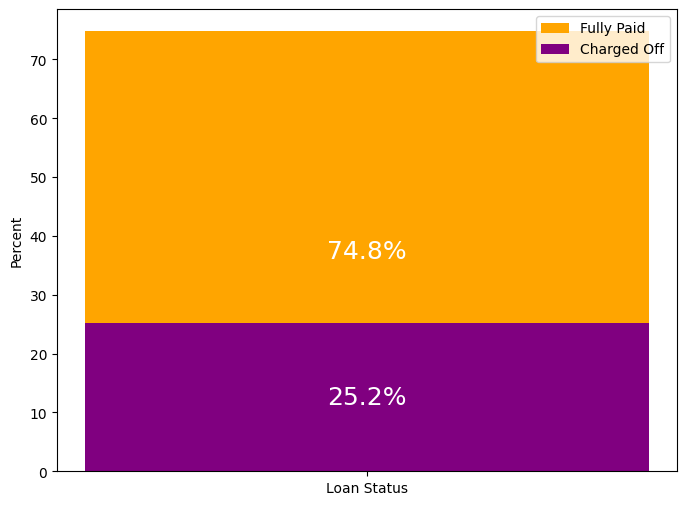

In [33]:
df_target = df.groupby('Loan Status').size().reset_index(name = 'Total')
df_target.columns = ['Loan Status', 'Total']
df_target['Percent'] = (100*df_target['Total']/len(df)).round(2) 
fig, ax =plt.subplots(figsize = (8,6))
ax2 = ax.bar('Loan Status', df_target[df_target['Loan Status'] == 'Fully Paid']['Percent'].values[0], color = 'orange', label = 'Fully Paid')
ax1 = ax.bar('Loan Status', df_target[df_target['Loan Status'] == 'Charged Off']['Percent'].values[0], color = 'purple', label = 'Charged Off')


for p in ax1.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=18, color='white', xytext=(0, 0),
                        textcoords='offset points') 
for p in ax2.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=18, color='white', xytext=(0, 0),
                        textcoords='offset points') 

ax.set_ylabel('Percent')
ax.legend()

In [34]:
#The target feature show that this is the imbalance target feature

## 3.2.Numerical Feature

In [35]:
numerical_feature = df.select_dtypes(include = [np.number]).columns.tolist()
len(numerical_feature)

12

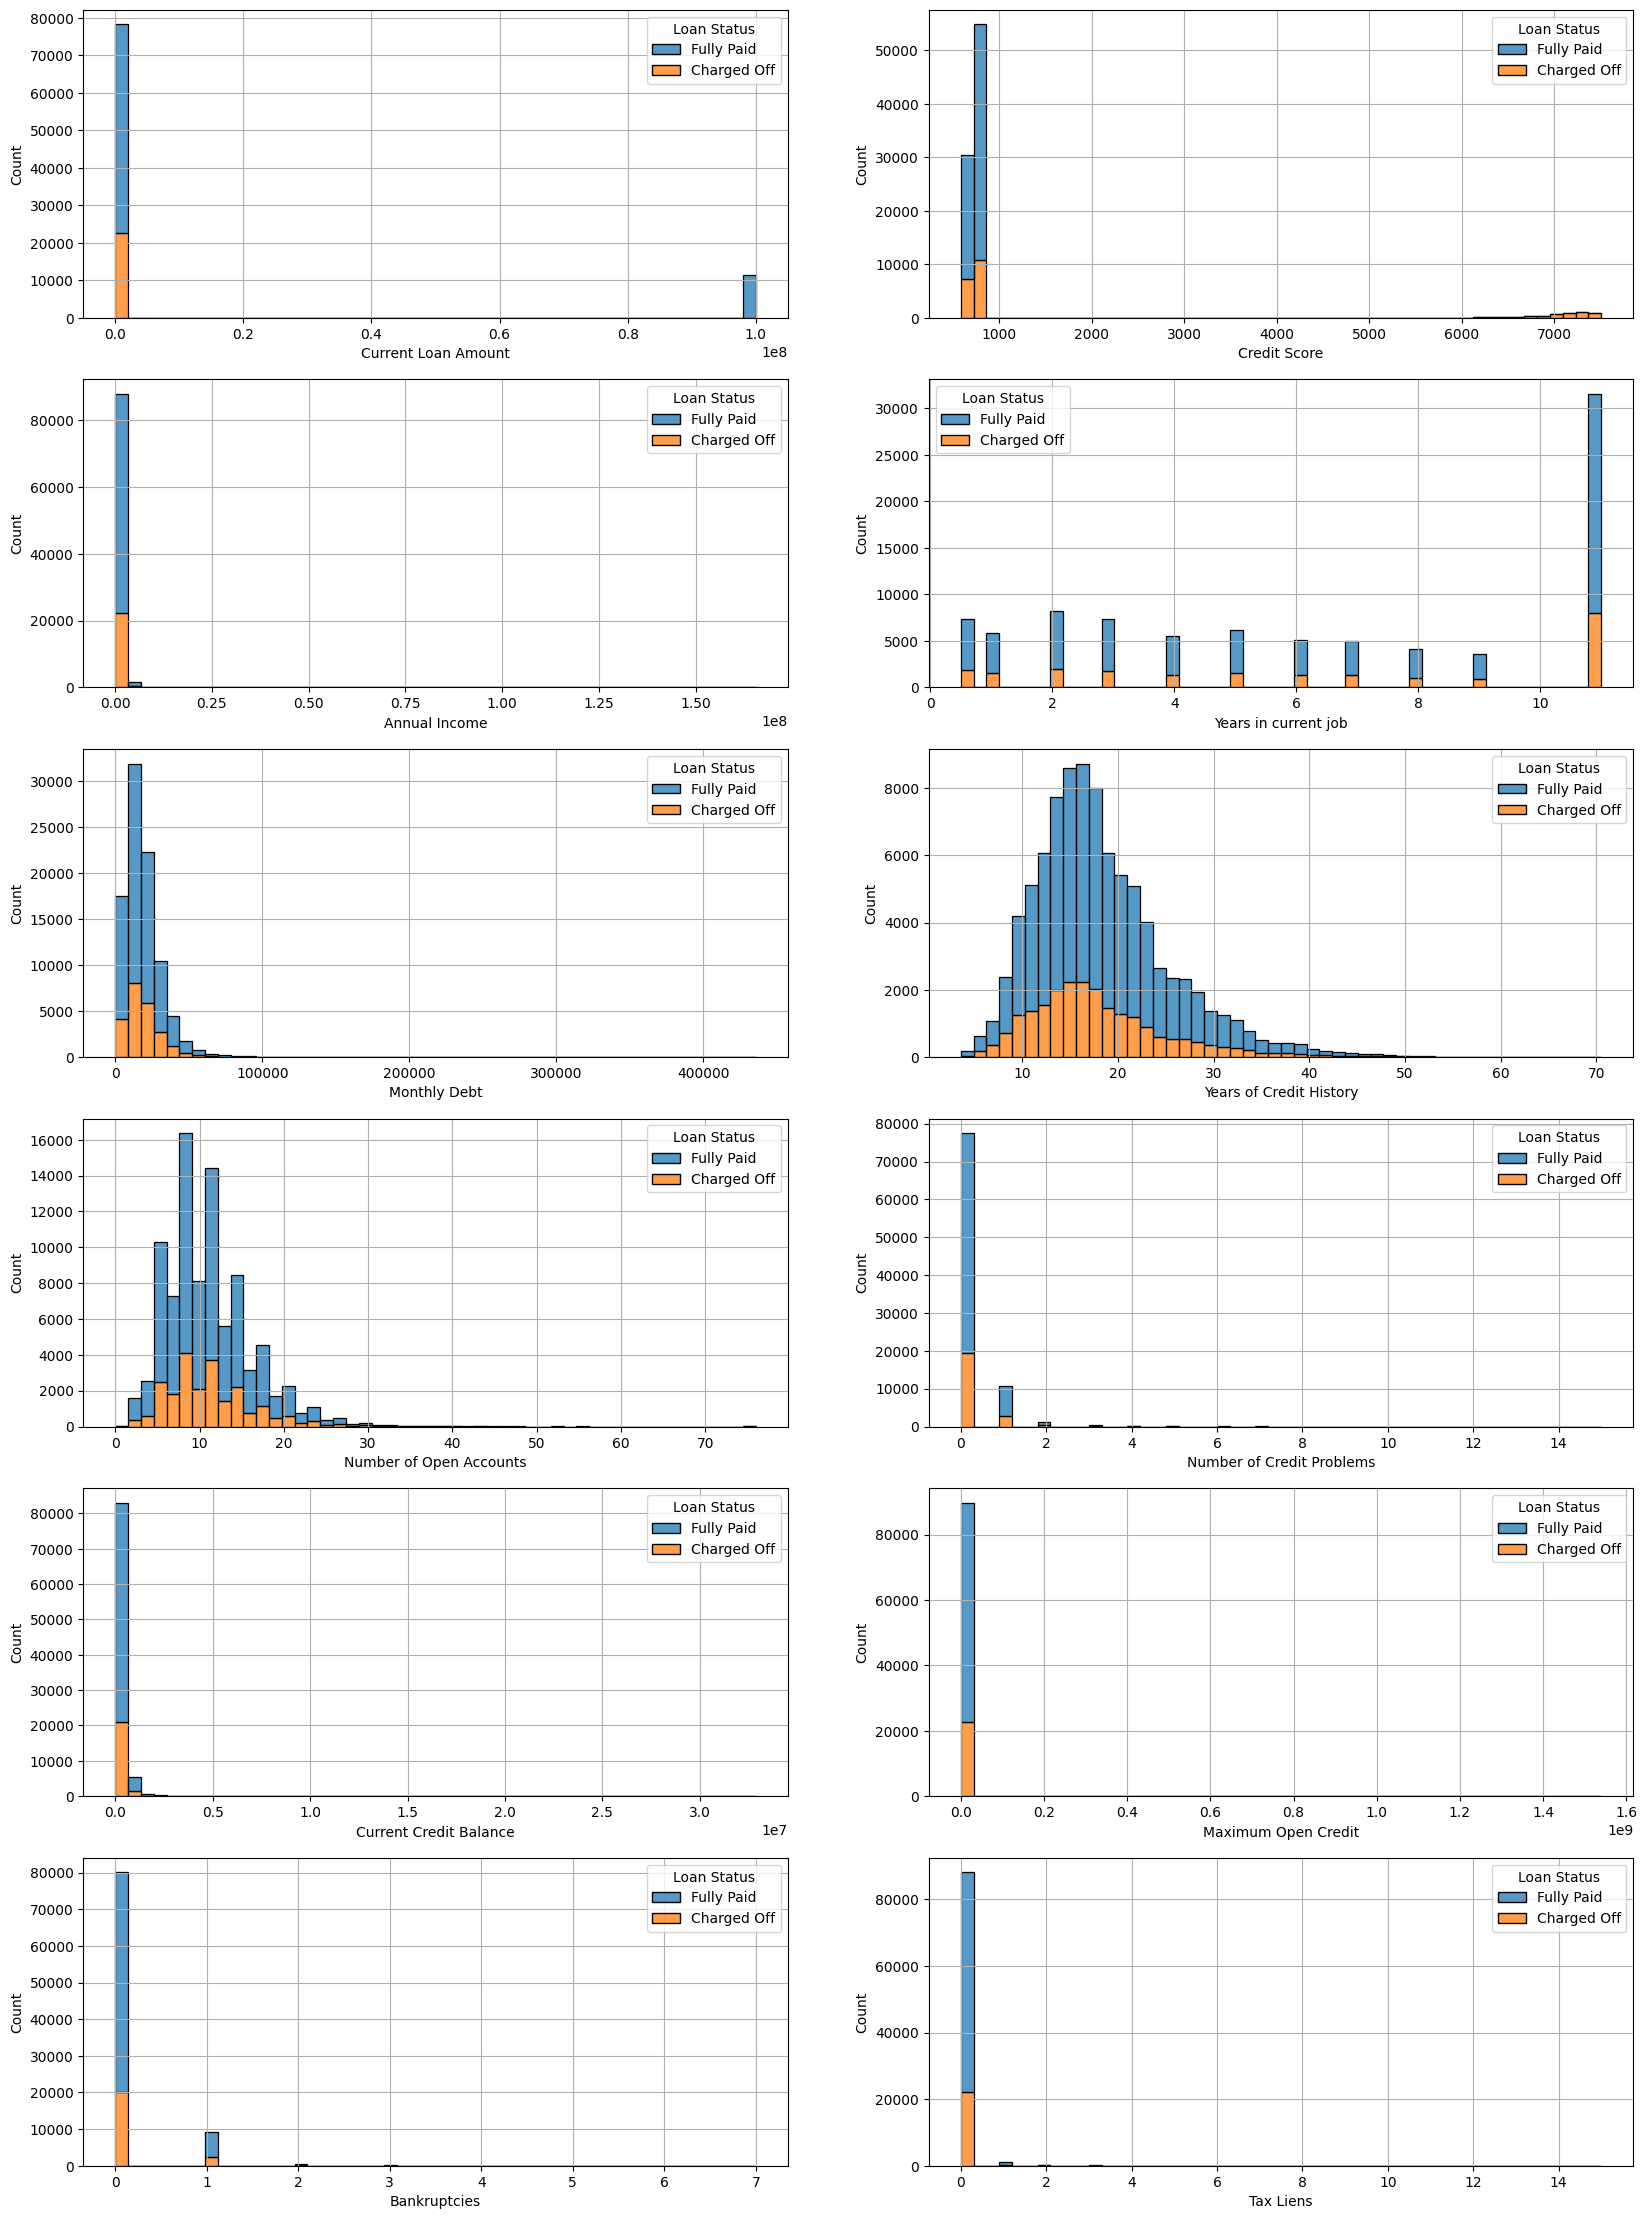

In [36]:
fig, ax = plt.subplots(6,2,figsize = (20,28))
for pos, i in enumerate(numerical_feature):  
    sns.histplot(df, x = i, stat = 'count', multiple = 'stack', bins = 50, hue = 'Loan Status', 
                ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].grid(True)
    sns.boxplot()

#### 
Có vẻ như Current Loan Amount và Credit Score có những ngoại lai mà chỉ mang 1 giá trị fully paid hoặc charged off. Cho nên ta sẽ 
loại bỏ phần ngoại lai này


In [37]:
dfm = df.copy()

In [38]:
dfm = dfm[(dfm['Current Loan Amount'] < 80000000) & (dfm['Credit Score'] < 1500)]
df = df[(df['Current Loan Amount'] < 80000000) & (df['Credit Score'] < 1500)]

In [39]:
dfm.shape

(73750, 16)

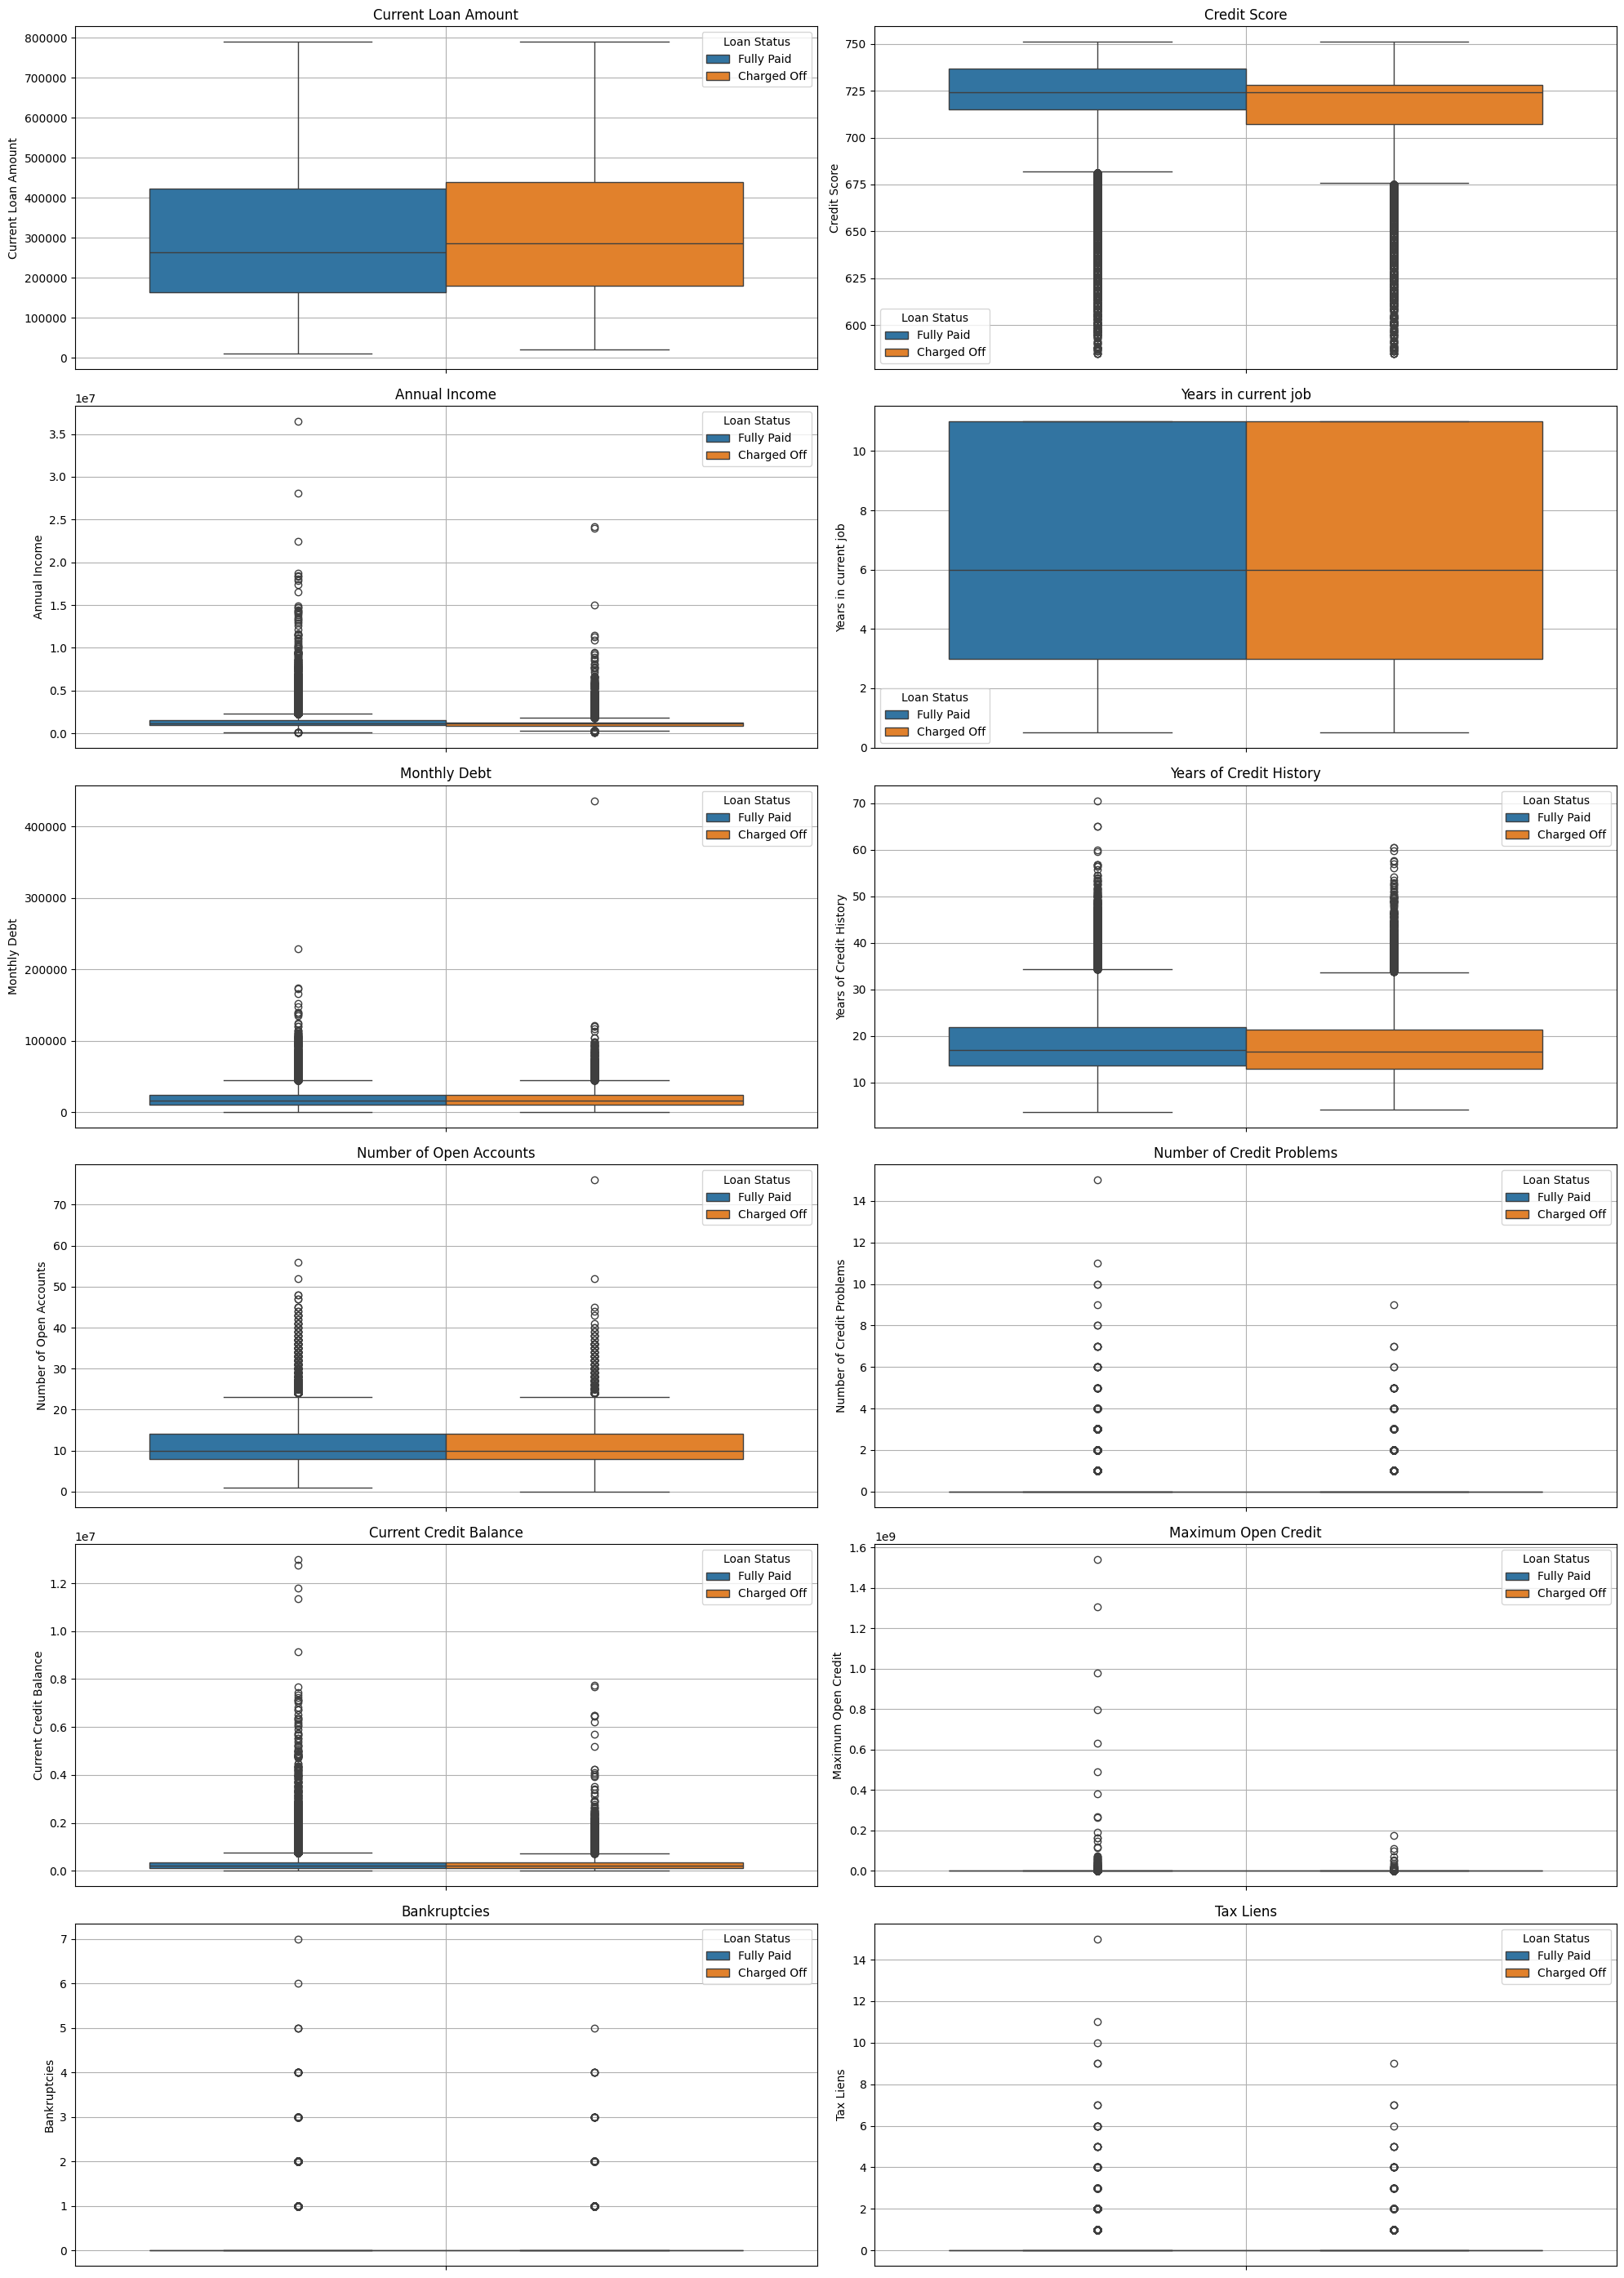

In [40]:
fig, ax = plt.subplots(6,2,figsize = (20,28))
for pos, i in enumerate(numerical_feature):  
    sns.boxplot(data = dfm, y = i, hue = 'Loan Status', ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].grid(True)
    ax[pos//2, pos%2].set_title(i)
plt.tight_layout()
plt.show()

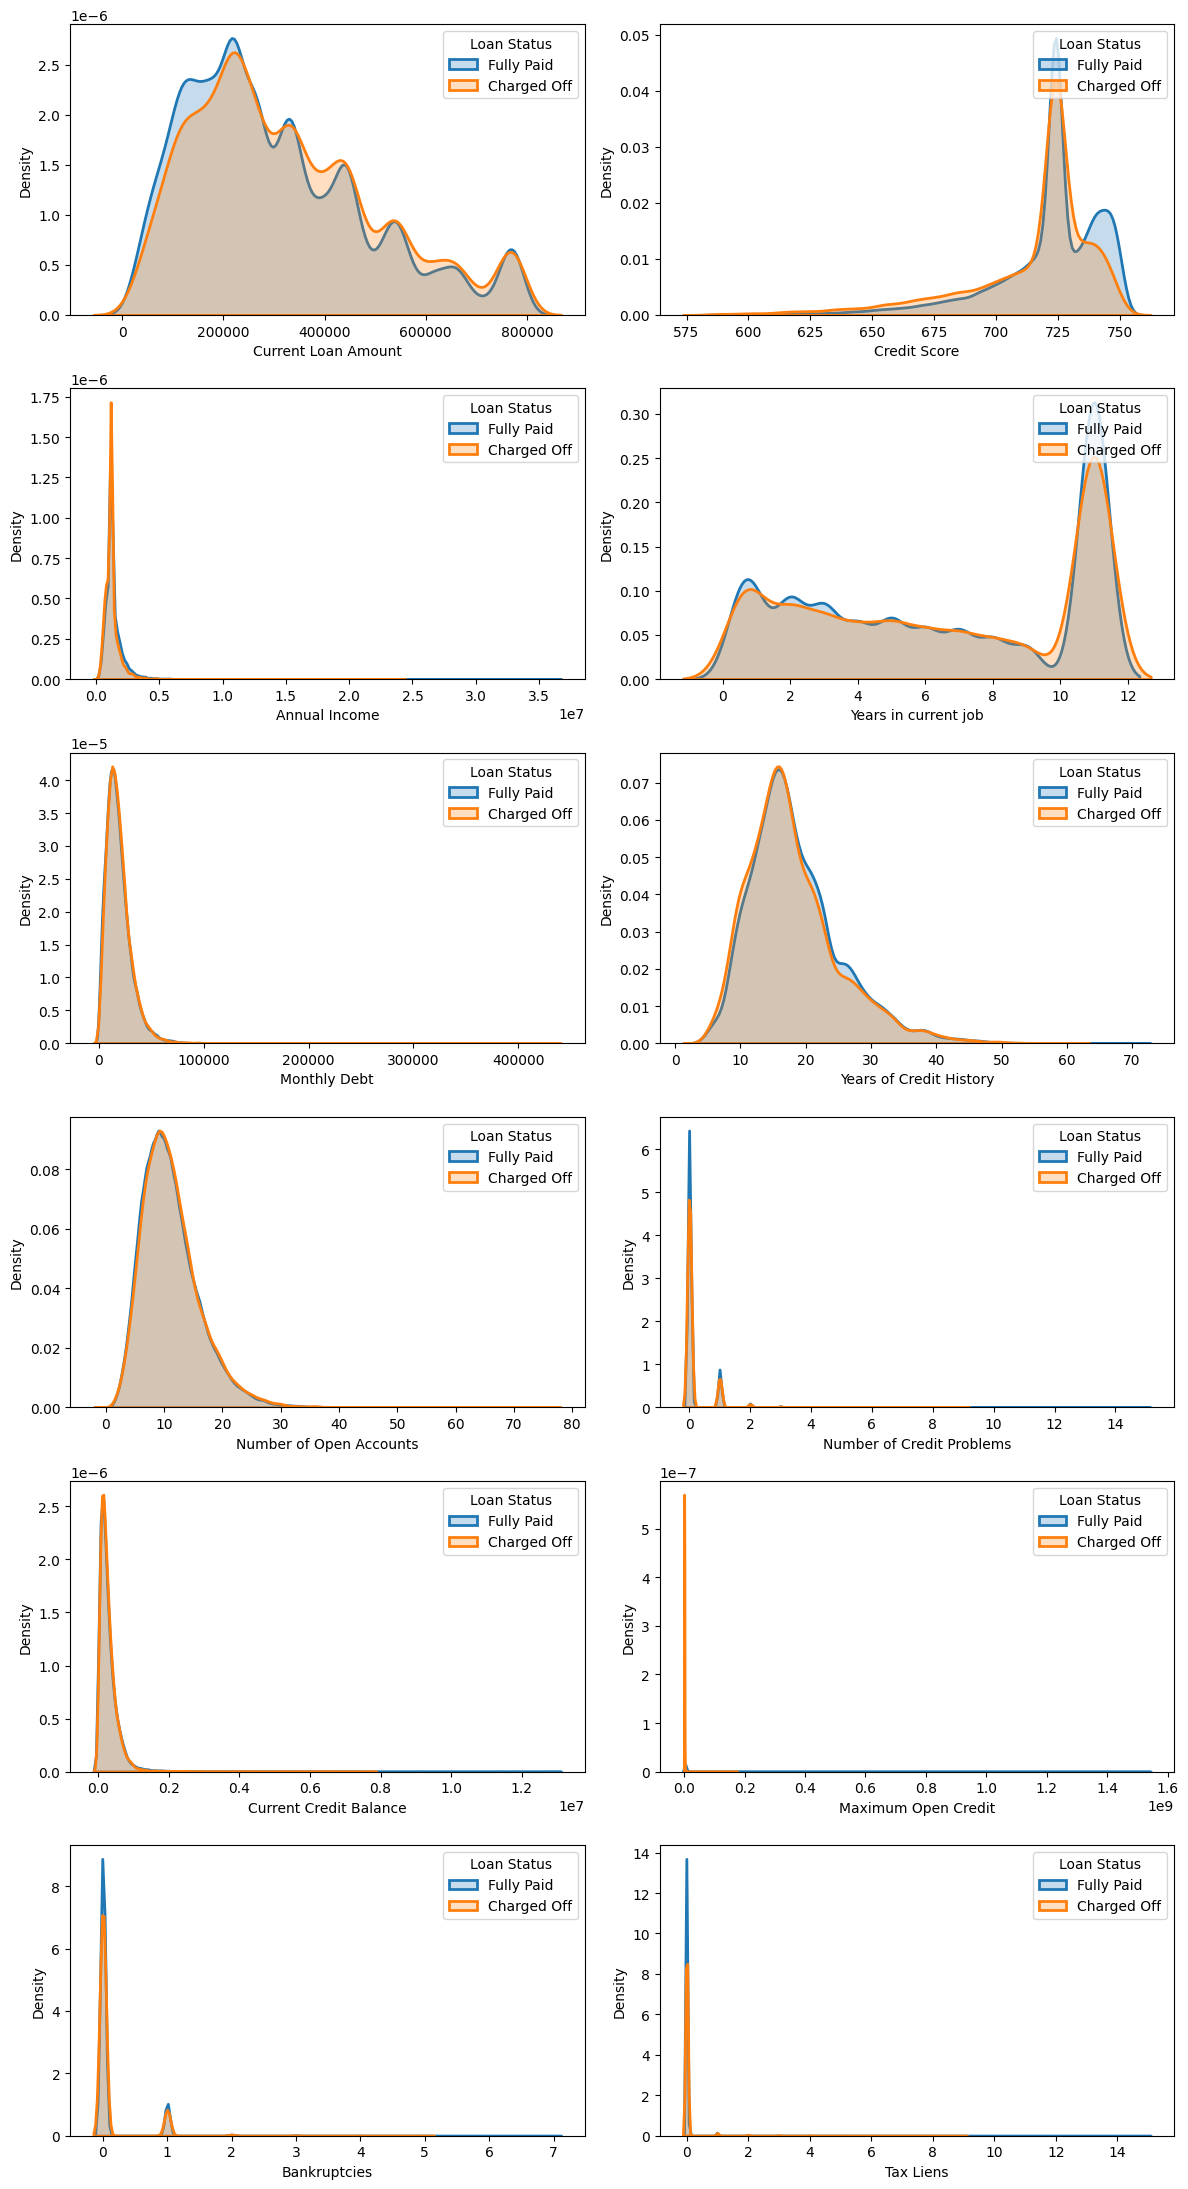

In [41]:
fig, ax = plt.subplots(6,2, figsize = (12,22))
for pos, i in enumerate(numerical_feature):
    sns.kdeplot(data = dfm[dfm['Loan Status'] == 'Fully Paid'], x = i, fill = True, linewidth =2,
               label = 'Fully Paid', ax = ax[pos//2, pos%2])
    sns.kdeplot(data = dfm[dfm['Loan Status'] == 'Charged Off'], x = i, fill = True, linewidth =2,
               label = 'Charged Off', ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].legend(title = 'Loan Status')
plt.tight_layout()
plt.show()

#### comment
- Trong khoảng 200000, mật độ của Current Loan Amount cao ở cả hai nhóm, nhưng fully paid có chút nhỉnh hơn
- Ta thấy biểu đồ credit score có sự khác biệt giữa điểm tín dụng của fully paid và charged off
Điểm số càng cao, tỉ lệ fully paid càng lớn
- Số năm làm việc trong công việc hiện tại > 10 năm có mật độ fully paid cao hơn so với charged off
- Number of credit problem/ Fully Paid/ Tax Liéns : Fully paid tập trung lớn ở mức  0 

In [42]:
dfm[dfm['Tax Liens'] > 10]['Loan Status']

22219    Fully Paid
29583    Fully Paid
Name: Loan Status, dtype: object

## 3.3. Categorical Feature

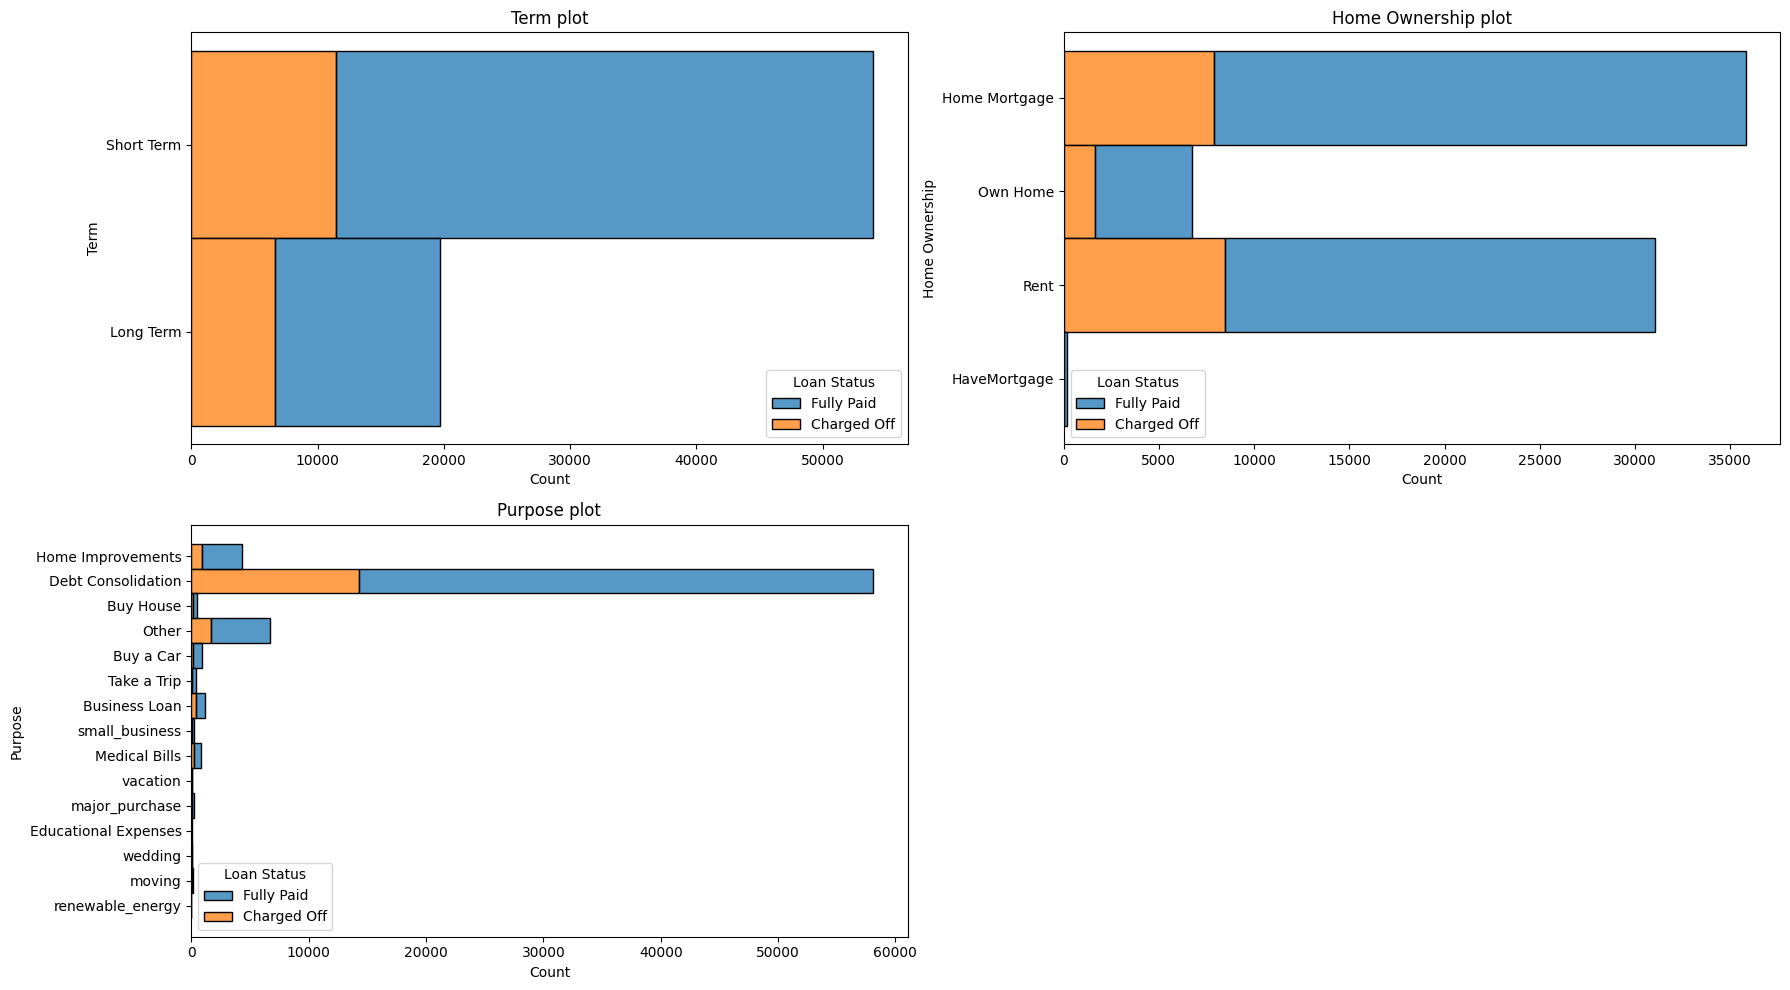

In [43]:
categorical_feature = dfm.select_dtypes(include = [object]).columns.tolist()
categorical_feature.remove('Loan Status')
categorical_feature
dfm['Purpose'] = dfm['Purpose'].replace('other', 'Other')
fig, ax = plt.subplots(2,2, figsize = (18,10))
for pos, i in enumerate(categorical_feature): 
    axp = sns.histplot(dfm, y = i, ax = ax[pos//2, pos %2], hue = 'Loan Status', multiple = 'stack', stat = 'count' )
    ax[pos//2, pos %2].set_title(f'{i} plot')    
for pos in range(len(categorical_feature), 2*2):
    fig.delaxes(ax[pos//2, pos %2])
plt.tight_layout()
plt.show()

#### comment
Term : 
- Khoản vay short term chiếm phần lớn. nhưng tỉ lệ fully paid chỉ chiếm 1/5. Trong khi của long term lại chiếm 1/3
Khách hàng sử dụng vay ngắn hạn có tỉ lệ trả nợ cao hơn với dài hạn

Home Ownership
- Home Mortgage chiếm tỉ trọng lớn, tỉ lệ fully paid là 3/4, trong khi Ren chiếm thứ 2 nhưng tỉ lệ fully paid chiếm 2/3, tỉ lệ tương tự với Own Home

Purpose :
- Tập trung số lượng lớn ở Debt Consolidation, tỉ lệ fully paid chiếm hơn 2/3

## 3.4. Heatmap

<Axes: >

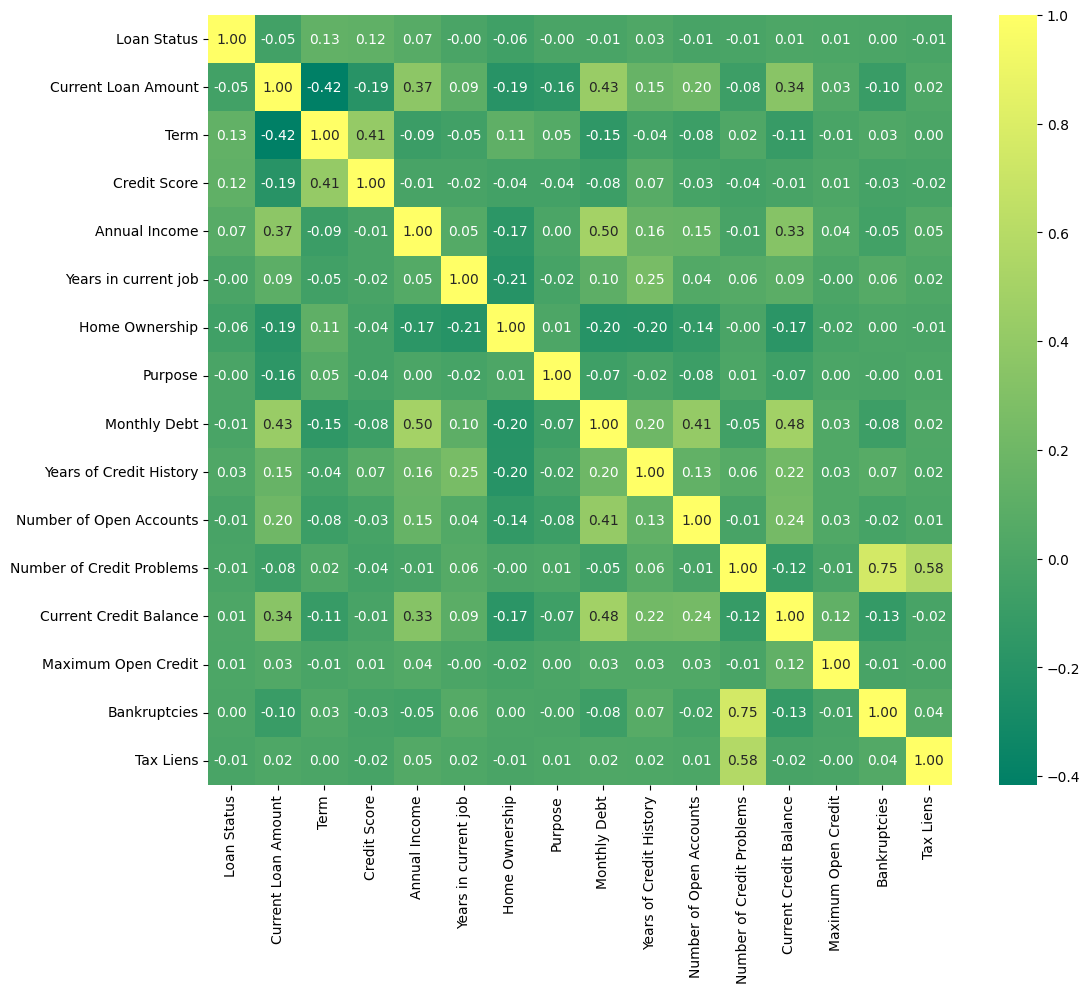

In [44]:
le = LabelEncoder()
for i in categorical_feature:
    dfm[i] = le.fit_transform(dfm[i])
dfm['Loan Status'] = le.fit_transform(dfm['Loan Status'])
dfm = dfm.reset_index(drop = True)
dfm_cor = dfm.corr()
plt.figure(figsize = (12,10))
sns.heatmap(dfm_cor, annot = True, fmt = '.2f', cmap = 'summer')

#### Các Feature có tương quan : 

Loan Status : 
- Current Loan Amount
- Term
- Credit Score

Annual Income: 
- Monthly debt

Number of Credit Problem
- Bankruptcies
- Tax Liens



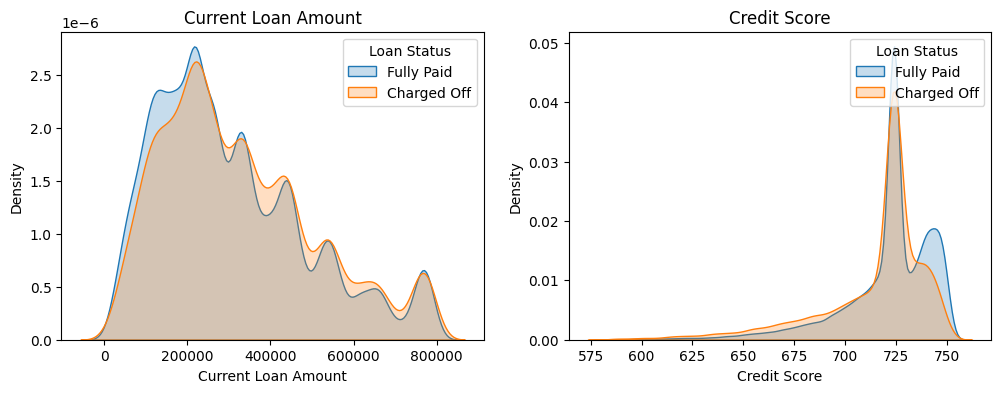

In [45]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
for pos, i in enumerate(['Current Loan Amount', 'Credit Score']):
    sns.kdeplot(data = df[df['Loan Status'] == 'Fully Paid'], x = i, fill = True, ax = ax[pos], label = 'Fully Paid' )
    sns.kdeplot(data = df[df['Loan Status'] == 'Charged Off'], x = i, fill = True, ax = ax[pos], label = 'Charged Off')
    ax[pos].set_title(i)
    ax[pos].legend(title = 'Loan Status')

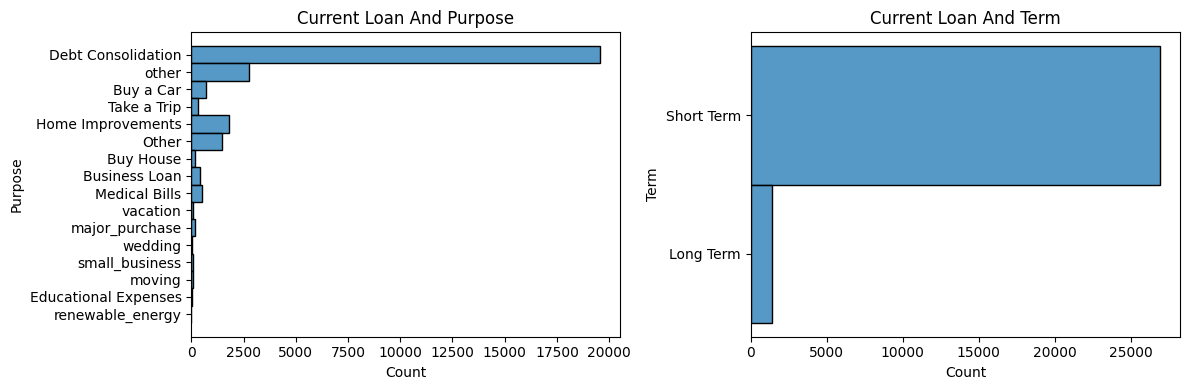

In [46]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.histplot(df[df['Current Loan Amount'] < 220000], y = 'Purpose', stat = 'count', multiple = 'stack', ax = ax[0])
ax[0].set_title('Current Loan And Purpose')
sns.histplot(df[df['Current Loan Amount'] < 220000], y = 'Term', stat = 'count', multiple = 'stack', ax = ax[1])
ax[1].set_title('Current Loan And Term')
plt.tight_layout()
plt.show()


#### Comment: 
Loan Status: 
- Current Loan Amount : Không có sự khác biệt quá rõ rệt trong fully paid và charged off. Tuy nhiên, có thể thấy ở múc 100K đến 200K, mật độ của fully
paid đang cao hơn một chút so với charged off
-> Có thể nói, các khoản vay nhỏ từ 0 đến 200k thường có tỉ lê fully paid cao hơn bởi : 

+ Những khoản nợ này tập trung ở "hợp nhất nợ", và mức lãi suất của kiểu vay này thấp hơn, với điều kiện trả nợ dễ dàng hơn. 
+ Phần lớn là vay ngắn hạn, dễ kiểm soát thời gian trả nợ

- Credit Score : Từ 725 đến trên 750 điểm tín dụng, Fully paid đang có mật độ cao hơn so với charged off

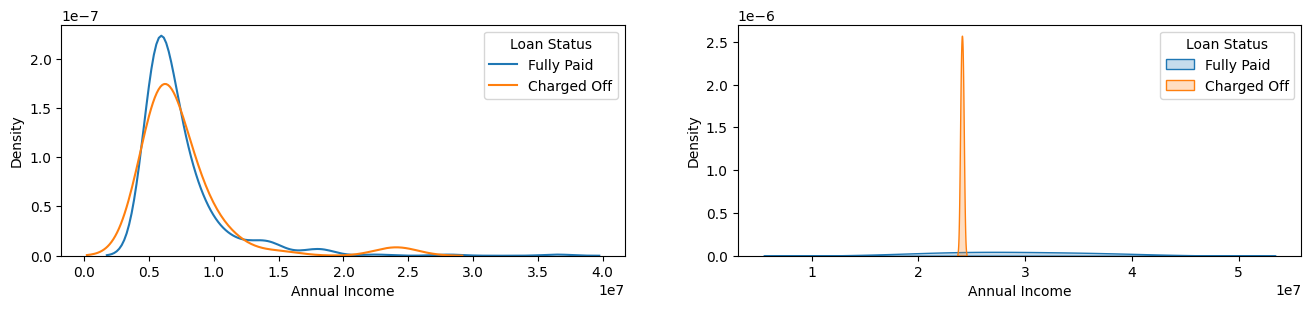

In [98]:
fig, ax = plt.subplots(1,2, figsize = (16,3))
sns.kdeplot(data = df[(df['Loan Status'] == 'Fully Paid') & (df['Annual Income'] > 5000000)], x = 'Annual Income', label = 'Fully Paid', ax = ax[0])
sns.kdeplot(data = df[(df['Loan Status'] == 'Charged Off') & (df['Annual Income'] > 5000000)], x = 'Annual Income', label = 'Charged Off', ax = ax[0])
ax[0].legend(title = 'Loan Status')

sns.kdeplot(data = df[(df['Loan Status'] == 'Fully Paid') & (df['Annual Income'] > 20000000)], x = 'Annual Income', fill = True, label = 'Fully Paid', ax = ax[1])
sns.kdeplot(data = df[(df['Loan Status'] == 'Charged Off') & (df['Annual Income'] > 20000000)], x = 'Annual Income', fill = True, label = 'Charged Off', ax = ax[1])
ax[1].legend(title = 'Loan Status')

<Axes: xlabel='Annual Income', ylabel='Annual Income'>

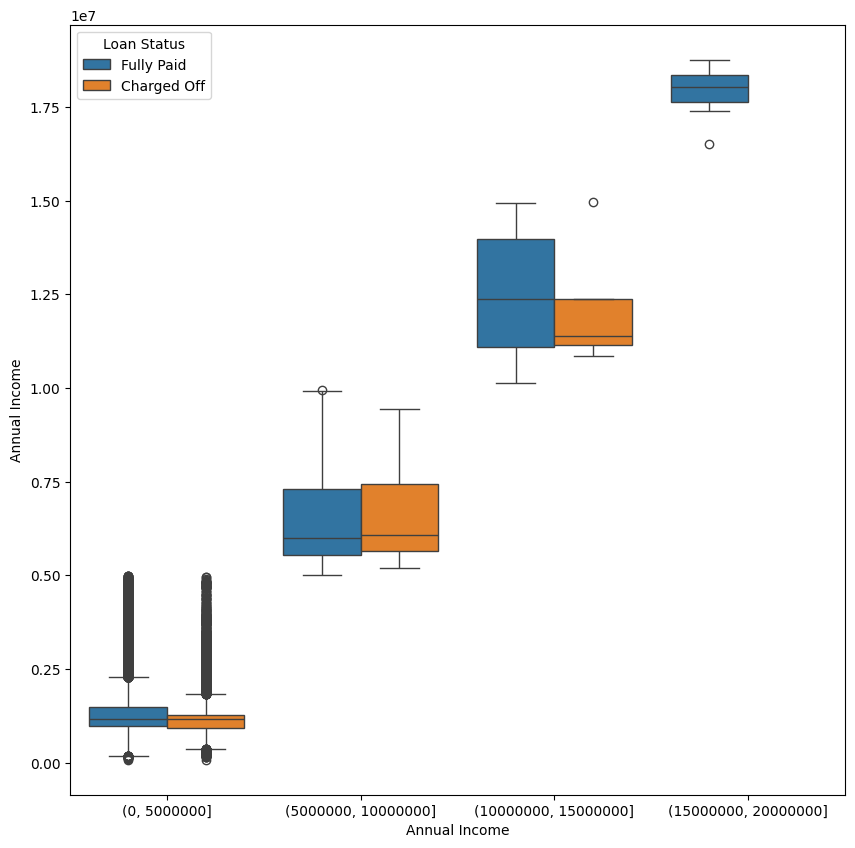

In [108]:
bins = range(0,25000000, 5000000)
plt.figure(figsize = (10,10))
x_ = pd.cut(df['Annual Income'], bins = bins)
sns.boxplot(df, x = x_, y = 'Annual Income', hue = 'Loan Status')

#### Thu nhập của khách hàng càng cao, gần như họ có khả năng chi trả nợ tốt hơn, tỉ lệ fully paid thấp hơn

<Axes: xlabel='Number of Credit Problems', ylabel='Tax Liens'>

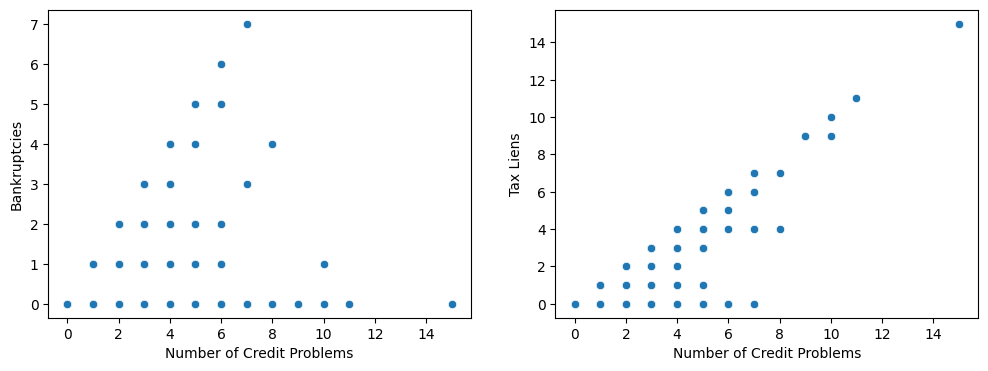

In [47]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.scatterplot(df, x = 'Number of Credit Problems', y = 'Bankruptcies', ax = ax[0])
sns.scatterplot(df, x = 'Number of Credit Problems', y = 'Tax Liens',  ax = ax[1])

#### Comment
Number of Credit Problem

Bankruptcies : Mặc dù không có đường xu hướng rõ ràng, biểu đồ này có thể gợi ý rằng có một mối quan hệ giữa số lượng vấn đề 
tín dụng và số lần phá sản. Cụ thể, khi số lượng vấn đề tín dụng tăng, số lần phá sản cũng có thể tăng theo.

Tax Liens : Mặc dù không có đường xu hướng rõ ràng, biểu đồ này có thể gợi ý rằng có một mối quan hệ giữa số lượng vấn đề 
tín dụng và số vấn đề liên quan tới thuế. Cụ thể, khi số lượng vấn đề về Tax và Bankruptcies tăng lên, các vấn đề của number
credit cũng tăng lên

<Axes: xlabel='Loan Status', ylabel='Number of Credit Problems'>

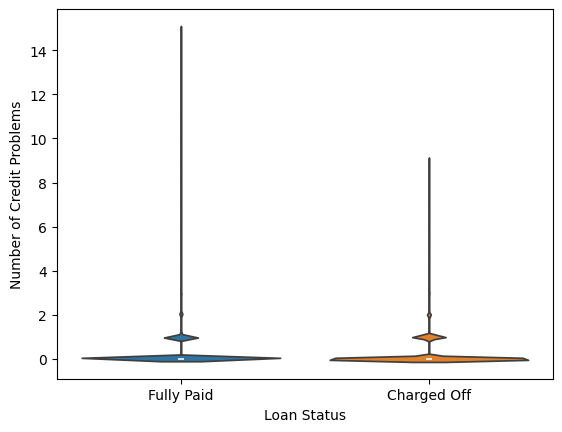

In [48]:
sns.violinplot(df, y = 'Number of Credit Problems', x = 'Loan Status', hue = 'Loan Status' )

#### Comment
Bộ dữ liệu của number of credit problem không có sự khác biệt rõ ràng giữa fully paid và charged off

# IV. Model Selection - Feature Importance

## 4.1. Select Model

In [49]:
dfm
#Fully paid = 1
#charged off = 0

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1174162.0,11.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
3,1,176220.0,1,724.0,1174162.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
4,1,217646.0,1,730.0,1184194.0,0.5,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73745,0,429132.0,1,724.0,1174162.0,11.0,1,3,28948.02,16.3,16.0,0.0,485279.0,656414.0,0.0,0.0
73746,1,48796.0,1,724.0,1174162.0,4.0,1,9,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
73747,1,210584.0,1,719.0,783389.0,1.0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
73748,1,103136.0,1,742.0,1150545.0,6.0,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [50]:
x = dfm.drop(columns = 'Loan Status')
y = dfm['Loan Status']
scaled = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[numerical_feature] = scaled.fit_transform(x_train_scaled[numerical_feature])
x_test_scaled[numerical_feature] = scaled.transform(x_test_scaled[numerical_feature])

In [63]:
classifiers = {
    'GradientBoosting' : GradientBoostingClassifier(random_state = 42),
    'RandomForest' : RandomForestClassifier(random_state = 42),
    'DecisionTree' : DecisionTreeClassifier(random_state = 42),
    'LogisticRegression' : LogisticRegression(random_state = 42),
    'KNeighbor' : KNeighborsClassifier()
}

In [64]:
accuracy_df = pd.DataFrame()
f1_df = pd.DataFrame()
for name, model in classifiers.items():
    print(f'Training {name}......')
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'accuracy score : {accuracy}')
    print(f'f1 score : {f1}')
    accuracy_pd = pd.DataFrame({'name': [name], 'Accuracy_score': [accuracy]})
    f1_pd = pd.DataFrame({'name': [name], 'F1_score': [f1]})

    accuracy_df = pd.concat([accuracy_pd, accuracy_df])
    f1_df = pd.concat([f1_pd, f1_df])

    

Training GradientBoosting......
accuracy score : 0.7551864406779661
f1 score : 0.8600441843339406
Training RandomForest......
accuracy score : 0.7522711864406779
f1 score : 0.8564469238626542
Training DecisionTree......
accuracy score : 0.6466440677966102
f1 score : 0.7642055736518277
Training LogisticRegression......
accuracy score : 0.7540338983050847
f1 score : 0.8594887683965918
Training KNeighbor......
accuracy score : 0.711864406779661
f1 score : 0.8244527054935977


In [65]:
accuracy_df = accuracy_df.sort_values('Accuracy_score', ascending = False)
f1_df = f1_df.sort_values('F1_score', ascending = False)

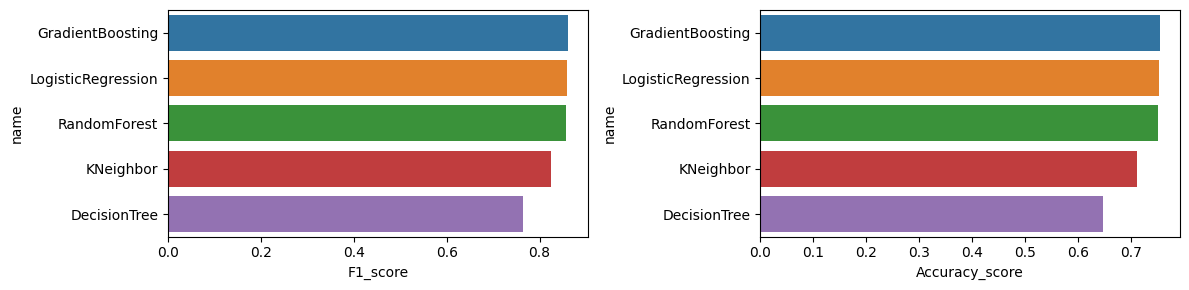

In [68]:
fig, ax = plt.subplots(1,2, figsize = (12,3))
sns.barplot(f1_df, x = 'F1_score', y = 'name', hue = 'name', ax = ax[0])
sns.barplot(accuracy_df, x = 'Accuracy_score', y = 'name', hue = 'name', ax = ax[1])
plt.tight_layout()
plt.show()

## 4.2. Feature Importance

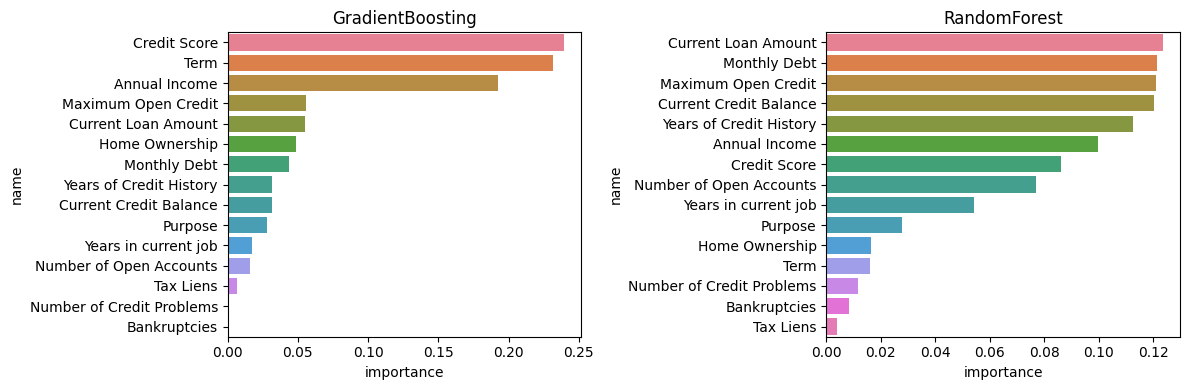

In [72]:
class_ = {
    'GradientBoosting' : GradientBoostingClassifier(random_state = 42),
    'RandomForest' : RandomForestClassifier(random_state = 42)
}
fig, ax = plt.subplots(1,2, figsize = (12,4))
for pos, i in enumerate(class_):
    model = class_[i]
    model.fit(x_train_scaled, y_train)
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'name': x.columns, 'importance': importance}).sort_values('importance', ascending = False)
    sns.barplot(feature_importance, x = 'importance', y = 'name', ax = ax[pos], hue = 'name')
    ax[pos].set_title(i)
plt.tight_layout()
plt.show()
    

<Axes: xlabel='importance', ylabel='name'>

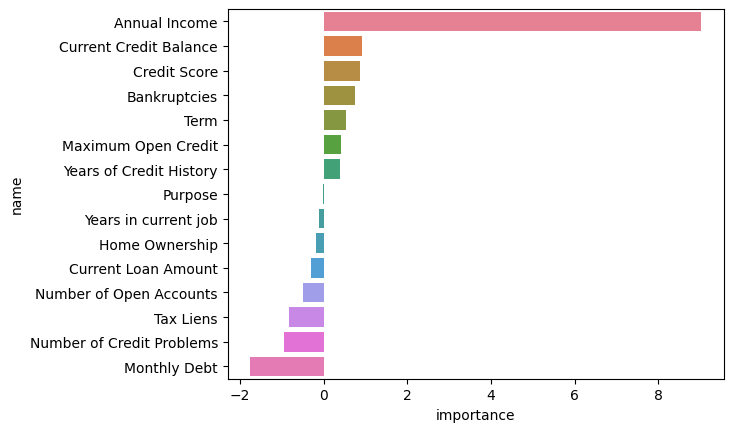

In [76]:
model = LogisticRegression(random_state = 42)
model.fit(x_train_scaled, y_train)
importance = model.coef_[0]
feature_importance = pd.DataFrame({'name':x.columns, 'importance' : importance}).sort_values('importance', ascending = False)
sns.barplot(feature_importance, x = 'importance', y = 'name', hue = 'name')
